<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [11]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
df = df.drop('Unnamed: 0',axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [18]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [21]:
## no null values

In [25]:
##univariate analysis

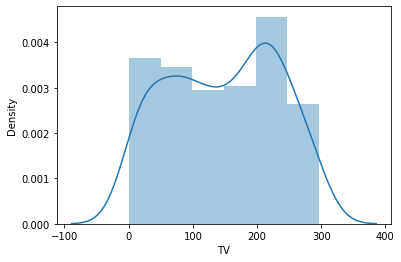

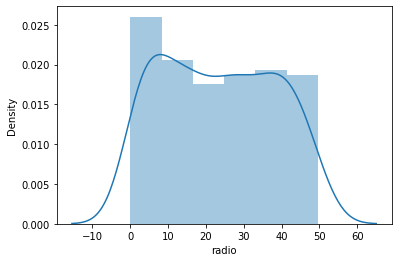

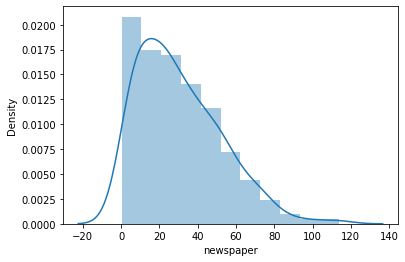

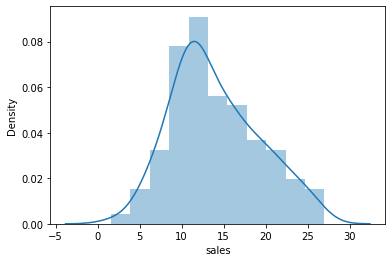

In [26]:
# making distplot
cols=df.columns.values
for i in cols:
    plt.subplots()
    sns.distplot(df[i])

In [27]:
  df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

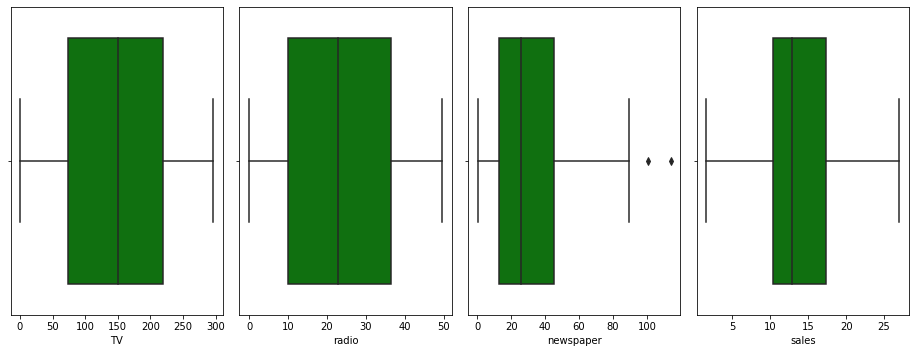

In [29]:
plt.figure(figsize=(16,24))
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    sns.boxplot(df[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [30]:
##bivariate analysis

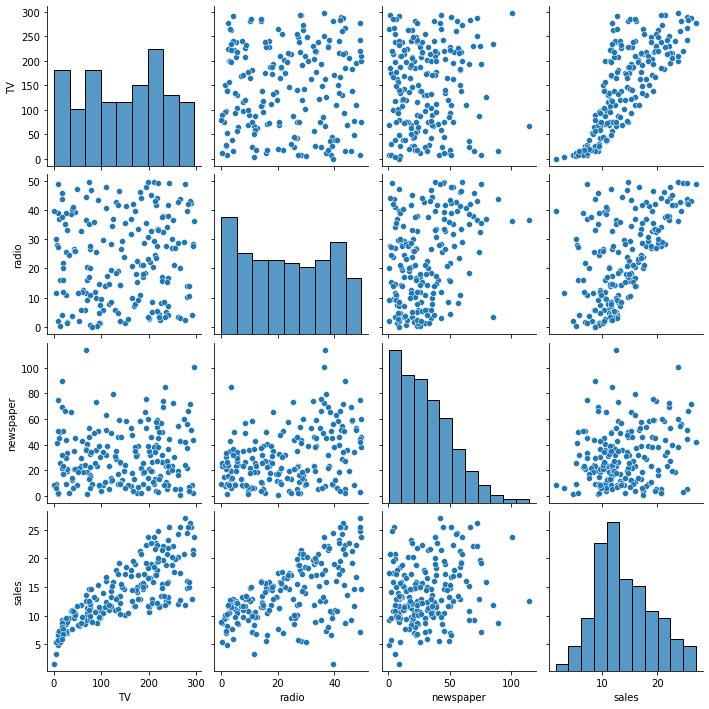

In [31]:
sns.pairplot(df)

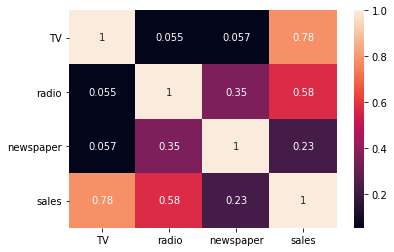

In [33]:
sns.heatmap(df.corr(),annot=True)

In [35]:
##outliers

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df2=df[(z<3).all(axis=1)]
df2.shape

(198, 4)

In [37]:
df.shape

(200, 4)

In [38]:
## 2 outliers are removed

In [40]:
x = df2.drop('sales',axis=1)
y = df2['sales']

In [42]:
## model bulding

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)

In [45]:
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

In [46]:
def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

In [47]:

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return test_score,mse,rmse,mae

In [48]:
lr=LinearRegression(n_jobs=-1)
dt=DecisionTreeRegressor(random_state=45)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rid=Ridge(random_state=45)
ls=Lasso(random_state=45)
rf=RandomForestRegressor(n_jobs=-1,random_state=45)
xgb=XGBRegressor(n_jobs=-1,random_state=45)
ada=AdaBoostRegressor(random_state=45)

In [57]:
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))
print('ADA',get_score(ada,x,y))

LR  (0.8866608742386285, 0.9172281198896013, 1.4684402521496633)
DT  (1.0, 0.9349453073122553, 1.3178770807628455)
SVR  (0.8421298825324117, 0.6535753947772471, 2.2454871802158083)
KNN  (0.9523521589204273, 0.9041646357121382, 1.471293308623403)
RID  (0.886660873914256, 0.9172264439870285, 1.4684402750091947)
LS  (0.8864167725536375, 0.9155717814673597, 1.4692710256884614)
RF  (0.99699215065241, 0.976893290743596, 0.7634802813432675)
[08:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB  (0.998145757616791, 0.9823294308309977, 0.6781194053094733)
ADA (0.9790089723548742, 0.9552424362427497, 1.050980122624451)


In [53]:
##xg boost regressor is performing the best

In [54]:
import joblib
joblib.dump(xgb,'sales.pkl')

['sales.pkl']